## Additional Information

The NASA data set comprises different size NACA 0012 airfoils at various wind tunnel speeds and angles of attack. The span of the airfoil and the observer position were the same in all of the experiments.


This problem has the following inputs:
1. Frequency, in Hertzs. 
2. Angle of attack, in degrees. 
3. Chord length, in meters.
4. Free-stream velocity, in meters per second. 
5. Suction side displacement thickness, in meters. 

The only output is:
6. Scaled sound pressure level, in decibels. 

In [1]:
import pandas as pd

In [2]:
pd.read_csv("airfoil_self_noise.dat" , sep= "\t")

,800,0,0.3048,71.3,0.00266337,126.201
0,1000,0.0,0.3048,71.3,0.002663,125.201
1,1250,0.0,0.3048,71.3,0.002663,125.951
2,1600,0.0,0.3048,71.3,0.002663,127.591
3,2000,0.0,0.3048,71.3,0.002663,127.461
4,2500,0.0,0.3048,71.3,0.002663,125.571
...,...,...,...,...,...,...
1497,2500,15.6,0.1016,39.6,0.052849,110.264
1498,3150,15.6,0.1016,39.6,0.052849,109.254
1499,4000,15.6,0.1016,39.6,0.052849,106.604
1500,5000,15.6,0.1016,39.6,0.052849,106.224


In [3]:
df = pd.read_csv("airfoil_self_noise.dat" , sep= "\t",header= None)

In [4]:
df.head()

,0,1,2,3,4,5
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [5]:
df.columns = ["Frequency","Angle of attack","Chord length","Free-stream velocity","Suction side displacement","Scaled sound pressure level"]

In [6]:
df.head()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side displacement,Scaled sound pressure level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [7]:
df.isnull().sum()

Frequency                      0
Angle of attack                0
Chord length                   0
Free-stream velocity           0
Suction side displacement      0
Scaled sound pressure level    0
dtype: int64

In [8]:
### frist do train and test split

In [9]:
X = df.iloc[:,:-1]
y= df.iloc[:,-1]

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.33, random_state=42)

In [11]:
X_train

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side displacement
845,500,11.2,0.0508,71.3,0.014072
1026,10000,4.8,0.0254,55.5,0.000873
621,2000,7.2,0.1524,39.6,0.009092
1371,630,6.7,0.1016,31.7,0.005929
195,6300,0.0,0.2286,71.3,0.002143
...,...,...,...,...,...
1130,250,12.7,0.0254,39.6,0.013025
1294,800,3.3,0.1016,71.3,0.002028
860,630,11.2,0.0508,39.6,0.015048
1459,315,12.3,0.1016,31.7,0.041876


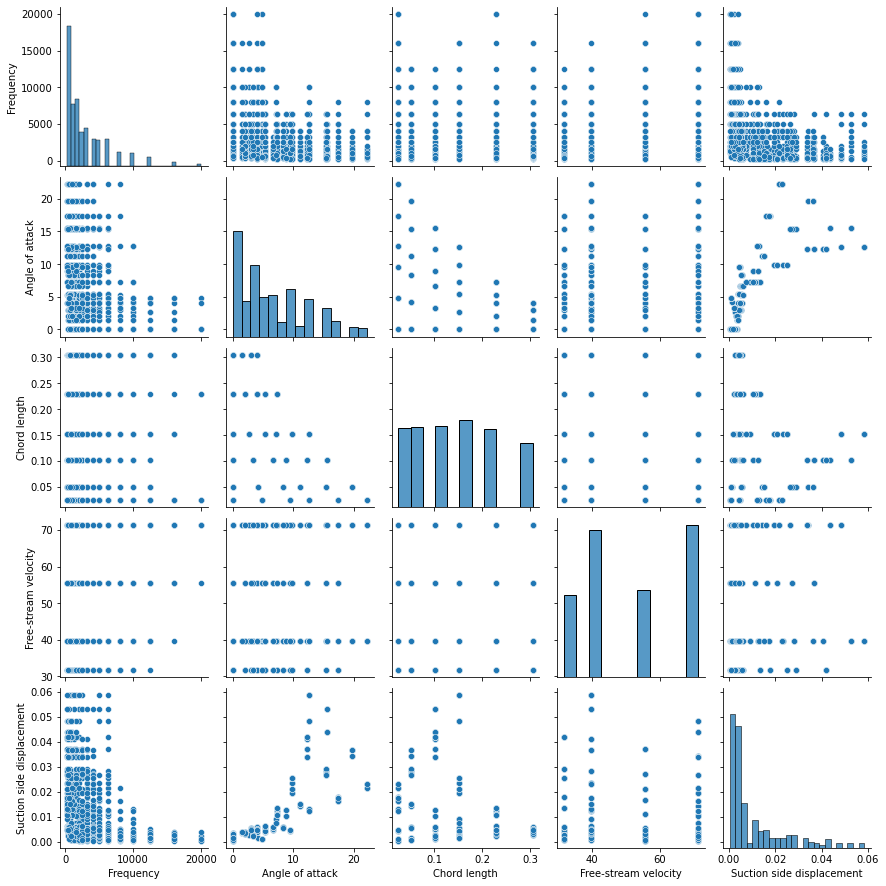

In [12]:
import seaborn as sns
sns.pairplot(X_train)

In [13]:
X_train.corr()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side displacement
Frequency,1.000000,-0.273327,-0.000324,0.125247,-0.239878
Angle of attack,-0.273327,1.000000,-0.498257,0.058603,0.762567
Chord length,-0.000324,-0.498257,1.000000,0.013061,-0.220849
Free-stream velocity,0.125247,0.058603,0.013061,1.000000,-0.000519
Suction side displacement,-0.239878,0.762567,-0.220849,-0.000519,1.000000


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Frequency'>

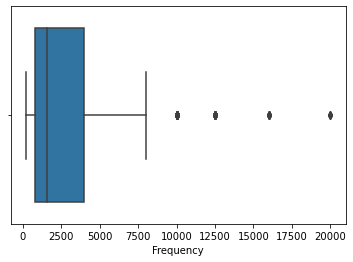

In [14]:
sns.boxplot(X_train["Frequency"])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Frequency', ylabel='Scaled sound pressure level'>

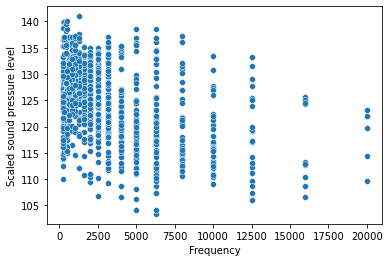

In [15]:
sns.scatterplot(X_train['Frequency'],y)

In [16]:
from sklearn.linear_model import LinearRegression,Ridge, Lasso, ElasticNet
model = LinearRegression()

In [17]:
model.fit(X_train, y_train)

LinearRegression()

In [18]:
pred =model.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [20]:
    # Calculating the accuracy score and error
    mse = mean_squared_error(y_test, pred)
    mae = mean_absolute_error(y_test, pred)
    rmse = np.sqrt(mse)
    r2= r2_score(y_test, pred)
    print(mse,mae,rmse,r2)

22.954669535134105 3.7288137950232927 4.791103164735039 0.5124474986138432


In [21]:
from sklearn.tree import DecisionTreeRegressor

In [22]:
DT_model = DecisionTreeRegressor()

In [23]:
DT_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [24]:
prde_DT = DT_model.predict(X_test)

In [25]:
r2_score(y_test, prde_DT)


0.8456616279250903

In [26]:
# import matplotlib.pyplot as plt
# from sklearn import tree
# #plt.figure(figsize=(15,10))
# #tree.plot_tree(DT_model)

In [27]:
from sklearn.neighbors import KNeighborsRegressor

In [28]:
k_model = KNeighborsRegressor(n_neighbors=1)
k_model.fit(X_train, y_train)
knn_pred =k_model.predict(X_test)
r2_score(knn_pred,y_test)

-0.1940836405629509

In [29]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor( random_state=10)

In [30]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=10)

In [31]:
rf_pred =model.predict(X_test)

In [32]:
r2_score(rf_pred,y_test)

0.9157685265209501